# Spooler Utilization
<hr style="border:3px solid gray"> </hr>

## Project Objective & Deliverables
Identify process improvements utilizing Bite Size spooler during Original turtle production.<br>
Justify utilizing Bite Size spooler during Original turtle production instaed of the Original spooler.<br>
Reduced flipped, chopped, and poor row alignment. 

## Key Take Aways
1. Utilize the Bite spooler during Original turtle production relative to the Original spooler to observe these savings.
2. Conservatively, you save roughly \\$36.84, pounds of turtles every hour.
3. Conservatively, you save roughly 72.94 of direct costs every hour.
4. In this case, you save roughly 351.50 pounds of turtles every hour.
5. In this case, scrap change by 175.75 percent.
6. In this case, you save roughly \\$695.90 of direct costs every hour.

<hr style="border:2px solid gray"> </hr>

## Analysis

In [1]:
# Import pertinent modules.
from scipy.stats import ttest_ind,sem,t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data and declare variable types.
base_data = pd.read_excel('2020_07_15_War on Waste_Spooler Data.xlsx','Spooler')
base_data = base_data.astype({'Caramel Moisture': int, 'Caramel Depositor Deposition Volume (°C)': int, 'Spooler Defects':int})

In [3]:
# Group Data and Describe Results
grouped_data = base_data.groupby('Spooler Type')
grouped_data[['Spooler Defects']].describe()

Spooler Defects                                               \
                       count   mean        std   min    25%    50%    75%   
Spooler Type                                                                
Bite                    25.0  34.88  39.636179   6.0  17.00   19.0   27.0   
Original                10.0  97.00  22.251092  64.0  77.25  103.0  111.5   

                     
                max  
Spooler Type         
Bite          151.0  
Original      126.0

In [4]:
# Marginalize Spooler Types
bite_spooler = base_data[base_data['Spooler Type'] == 'Bite']
original_spooler = base_data[base_data['Spooler Type'] == 'Original']

## Timeplot of Bite Spooler Defects

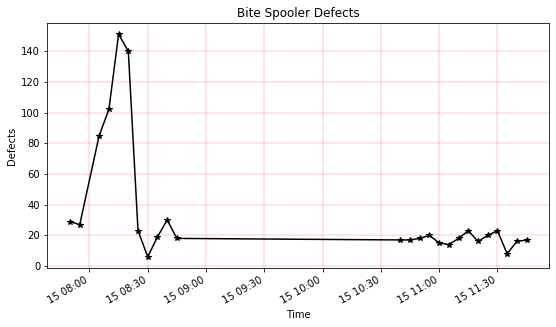

In [5]:
# Define figure size.
fig = plt.figure(figsize=(9, 5))
# Plot variables, color, and marker.
plt.plot(bite_spooler['Timestamp'],bite_spooler['Spooler Defects'],color='k',marker='*')
# Plot title and axises labels.
plt.title('Bite Spooler Defects')
plt.xlabel('Time')
plt.ylabel('Defects')
# Plot format date as x-axis.
plt.gcf().autofmt_xdate()
# Plot watermark grid lines.
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.show()

What happened from 08:00 to 08:30? After following up with Adam, he adjusted the first cooling tunnel and blower percentage to reduce the turtles' heat. Following the adjustments, we remained consistent and efficient.

In [6]:
# Remove extremeity from bite size
bite_spooler = base_data[base_data['Spooler Defects'] < 80]

## Timeplot of Original Spooler Defects

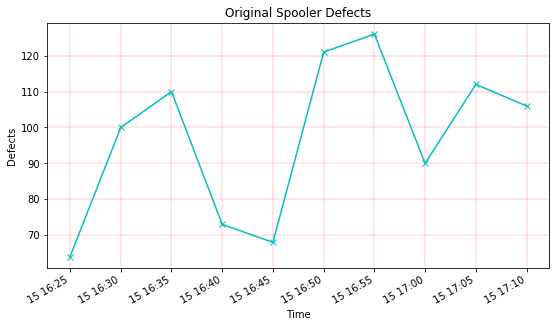

In [7]:
# Define figure size.
fig = plt.figure(figsize=(9, 5))
# Plot variables, color, and marker.
plt.plot(original_spooler['Timestamp'],original_spooler['Spooler Defects'],color='c',marker='x')
# Plot title and axises labels.
plt.title('Original Spooler Defects')
plt.xlabel('Time')
plt.ylabel('Defects')
# Plot format date as x-axis.
plt.gcf().autofmt_xdate()
# Plot watermark grid lines.
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.show()

The Original spooler produces high spooler defects and exhibits excessive inconsistency. Relative to the Bite spooler, the Original Spooler is a major scrap cause.

<hr style="border:2px solid gray"> </hr>

## Spooler Defects by Spooler

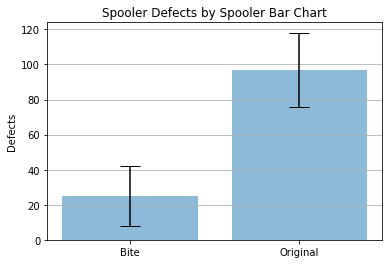

In [8]:
# Define relavent information for plot: Spooler Types, means, and standard deviations.
spooler_types = ['Bite','Original']
x_pos = np.arange(len(spooler_types))
spooler_defect_avgs = [np.mean(bite_spooler['Spooler Defects']),np.mean(original_spooler['Spooler Defects'])]
spooler_defect_errs = [np.std(bite_spooler['Spooler Defects']),np.std(original_spooler['Spooler Defects'])]
# Define figure.
fig, ax = plt.subplots()
# Plot variables, color, and marker.
ax.bar(x_pos, spooler_defect_avgs, yerr=spooler_defect_errs, align='center', alpha=0.5, ecolor='black', capsize=10)
# Plot title and axises labels.
ax.set_ylabel('Defects')
ax.set_xticks(x_pos)
ax.set_xticklabels(spooler_types)
ax.set_title('Spooler Defects by Spooler Bar Chart')
# Plot watermark grid lines.
ax.yaxis.grid(True)

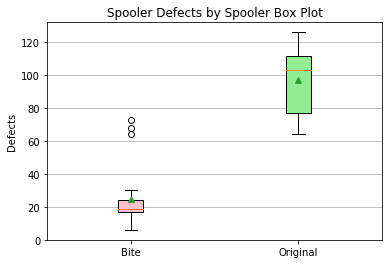

In [9]:
# Define figure size.
fig = plt.figure()
ax = fig.add_subplot(111)
# Plot title and axises labels.
ax.set_title('Spooler Defects by Spooler Box Plot')
ax.set_ylabel('Defects')
# Plot watermark grid lines.
ax.yaxis.grid(True)
# Plot variables, color, and marker.
bp = ax.boxplot([bite_spooler['Spooler Defects'],original_spooler['Spooler Defects']],
                showmeans=True,
                labels=['Bite','Original'],
                patch_artist=True)
# Add color.
colors = ['pink','lightgreen']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

Manifestly, the Bite spooler signifcantly reduces spooler defects during 501 production. Therefore, the Original should not be considered during 501 production compared to the Bite spooler.

## Two-Sample T-Test

Ho: Bite Spooler Defects >= Original Spooler Defects
<br></br>
Ha: Bite Spooler Defects < Original Spooler Defects

In [10]:
ttest_ind(bite_spooler['Spooler Defects'],original_spooler['Spooler Defects'])

Ttest_indResult(statistic=-10.033580365992464, pvalue=2.0884560129202984e-11)

Evidently, the p-value is less than alpha, which is 0.05; therefore, I reject the null hypothesis, in favor of the alternate, and conclude that the Bite spooler defects are statistically significanlty less than the Original spooler defects.

<hr style="border:2px solid gray"> </hr>

## Cost Savings

In [11]:
# Confidence Intervals
def upper_confidence_limit(sample):
    confidence_level = 0.95
    degrees_freedom = sample.size - 1
    sample_mean = np.mean(sample)
    sample_standard_error = sem(sample)
    confidence_interval = t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
    return confidence_interval[1]


# Bite Upper Confidence Interval
bite_upper = upper_confidence_limit(bite_spooler['Spooler Defects'])
# Original Upper Confidence Interval
original_upper = upper_confidence_limit(original_spooler['Spooler Defects'])
# Difference between Bite & Original Upper Confidence Intervals
saved_turtles_ea_five_min = original_upper-bite_upper
print('Conservatively, you save roughly ' + str((saved_turtles_ea_five_min * 17.3 * 12) * 0.00220462)[:5]
      + ' pounds of turtles every hour.')
print('Conservatively, you save roughly $' + str((saved_turtles_ea_five_min * 17.3 * 12) * 0.00220462 * 1.98)[:5]
      + ' of direct costs every hour.')

# Scrap Effects
ante_scrap = 400
exante_scrap = 1103
scrap_change = exante_scrap - ante_scrap
scrap_percentage_change = ((scrap_change)/ante_scrap)*100
scrap_change_dollar = scrap_change * 1.98
print('In this case, you save roughly ' + str(scrap_change/2)[:5] + ' pounds of turtles every hour.')
print('In this case, scrap change by ' + str(scrap_percentage_change) + ' percent.')
print('In this case, you save roughly $' + str(scrap_change_dollar/2)[:5] + ' of direct costs every hour.')

Conservatively, you save roughly 36.84 pounds of turtles every hour.
Conservatively, you save roughly $72.94 of direct costs every hour.
In this case, you save roughly 351.5 pounds of turtles every hour.
In this case, scrap change by 175.75 percent.
In this case, you save roughly $695.9 of direct costs every hour.


Utilize the Bite spooler during Original turtle production relative to the Original spooler to observe these savings.